In [1]:
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

'[' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
import fastbook
fastbook.setup_book()

from fastbook import *
from fastai.vision.widgets import *

In [3]:
df = pd.read_csv('mtg_classes_dataset\creature_image_types.csv')

In [4]:
path = Path('mtg_classes_dataset/')

In [5]:
fns = get_image_files(path)
fns

(#14999) [Path('mtg_classes_dataset/creature/ bird gets the worm_924a785e.jpg'),Path('mtg_classes_dataset/creature/ goblin_79503568.jpg'),Path('mtg_classes_dataset/creature/ o saurus_c43a1ba1.jpg'),Path('mtg_classes_dataset/creature/ trespasser_7dd65998.jpg'),Path('mtg_classes_dataset/creature/a ardent dustspeaker_c4f4469a.jpg'),Path('mtg_classes_dataset/creature/a asari captain_c85e917f.jpg'),Path('mtg_classes_dataset/creature/a baleful beholder_75749e31.jpg'),Path('mtg_classes_dataset/creature/a blessed hippogriff a tyrs blessing_2511763a.jpg'),Path('mtg_classes_dataset/creature/a cauldron familiar_f3e0b7c1.jpg'),Path('mtg_classes_dataset/creature/a celebrity fencer_ede630df.jpg')...]

In [6]:
failed = verify_images(fns)
failed

(#0) []

In [7]:
failed.map(Path.unlink);

In [8]:


dblock = DataBlock()
dsets = dblock.datasets(df)
     
len(dsets.train),len(dsets.valid)


(11998, 2999)

In [9]:
x,y = dsets.train[0]
x,y

(name        battershield warrior_4109c41e.jpg
 type                            human warrior
 is_valid                                False
 Name: 5494, dtype: object,
 name        battershield warrior_4109c41e.jpg
 type                            human warrior
 is_valid                                False
 Name: 5494, dtype: object)

In [10]:


def get_x(r): return "mtg_classes_dataset/creature/" + r['name']
def get_y(r): return r['type'].split()
     


In [11]:

df['type'] = df['type'].astype(str)
df['type'][2].split()

['zombie']

In [12]:


def splitter(df):
    train = df.index[~df['is_valid']].tolist()
    valid = df.index[df['is_valid']].tolist()
    return train,valid


dblock = DataBlock(blocks=(ImageBlock, MultiCategoryBlock),
                   splitter=splitter,
                   get_x=get_x, 
                   get_y=get_y,
                   item_tfms = RandomResizedCrop(128, min_scale=0.65))

dsets = dblock.datasets(df)
dsets.train[0]



(PILImage mode=RGB size=626x457,
 TensorMultiCategory([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                      0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                      0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                      0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                      0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

In [13]:

dls = dblock.dataloaders(df)

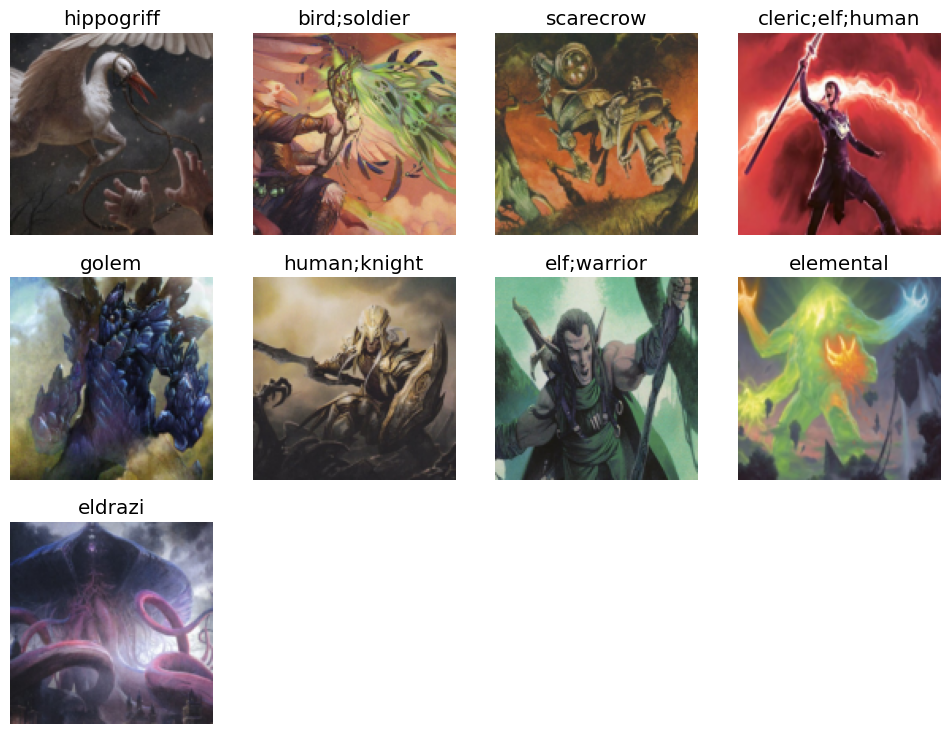

In [14]:


dls.show_batch(nrows=3, ncols=4)
     


In [15]:


learn = vision_learner(dls, resnet18)
     


In [16]:


x,y = to_cpu(dls.train.one_batch())
activs = learn.model(x)
activs.shape
     


torch.Size([64, 313])

In [17]:
activs[0]

TensorImage([ 0.4720,  0.6250,  1.0311,  2.6610, -1.5421, -0.8737, -0.9259,  1.2956,  1.0436,  7.0360,  1.7508,  2.9176,  3.2150, -6.3701,  0.9471, -2.0909, -2.0073,  1.3703, -0.9836,  0.5091,
              1.9156,  0.5902,  2.0707,  2.3881,  1.7507, -1.8369,  2.3858, -3.1940, -5.3212, -1.7450, -3.5079, -1.6537, -2.7154, -2.1188,  0.3827, -0.2673,  2.3662,  2.6915, -0.1446, -1.9518,
              2.2239,  1.3579,  0.1823, -2.4535, -1.5348,  2.4967, -0.3301, -0.1626,  0.1383,  0.3199,  0.1756, -0.4559, -1.4814,  3.4783,  2.3367,  2.6623,  4.4930,  3.6496, -4.5964, -2.1478,
             -3.1854,  0.1420,  3.5907, -3.1139,  1.7827, -0.3545, -1.2389,  3.2448,  1.1925, -2.4924,  1.7224, -0.0869, -4.9606,  2.5046, -0.1849, -1.7936, -0.9124,  0.3003, -1.6445,  1.2490,
             -0.8872, -0.1149,  1.8175,  1.6046,  2.2235, -2.6515,  2.2736, -0.8124, -0.3780,  1.5740,  2.3642,  5.5442, -2.8696, -2.7598, -1.1178,  3.1565, -0.4851, -0.8907, -2.0252, -0.4788,
              1.8925,  3.5675, -2.8

In [18]:
def binary_cross_entropy(inputs, targets):
    inputs = inputs.sigmoid()
    return -torch.where(targets==1, inputs, 1-inputs).log().mean()

dest = 'mtg_classes_dataset/creature/f9290c7f_sawtusk demolisher.jpg'
#dest = 'mtg_classes_dataset/creature/f9290c7f_sawtusk demolisher.jpg'
im = Image.open(dest)
im.to_thumb(128,128)

In [19]:


learn = vision_learner(dls, resnet50, metrics=partial(accuracy_multi, thresh=0.5))
learn.fine_tune(3, base_lr=3e-3, freeze_epochs=4)
     


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.901262,0.646132,0.639542,01:21
1,0.123029,0.032351,0.994866,01:20
2,0.033820,0.024576,0.994866,01:21
3,0.028066,0.022812,0.994877,01:20


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.025348,0.021443,0.994963,01:24
1,0.023441,0.020132,0.994996,01:25
2,0.021953,0.019821,0.995036,01:23


SuggestedLRs(valley=5.248074739938602e-05)

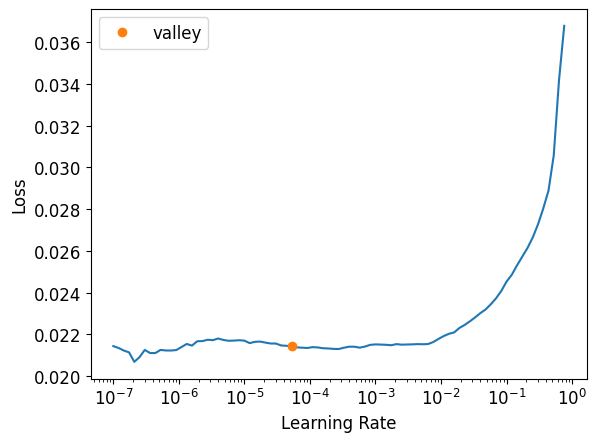

In [47]:
learn.lr_find()

In [46]:


lr = 1e-7
learn.fine_tune(3, lr)
     


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.021550,0.019846,0.995033,01:22


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.021575,0.019827,0.995017,01:25
1,0.021363,0.019802,0.995015,01:24
2,0.021564,0.019815,0.995038,01:24


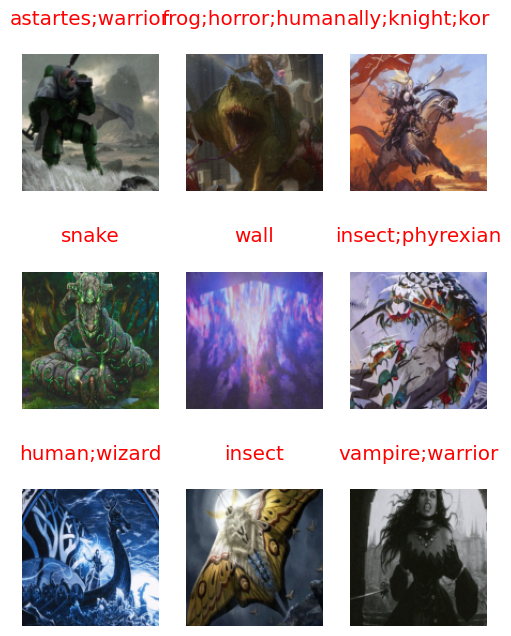

In [48]:
learn.show_results(ds_idx=1, nrows=3, figsize=(6,8))

In [49]:
# Make predictions for a specific image (e.g., image at index 0)
preds, _ = learn.get_preds(ds_idx=1, dl=learn.dls[1], with_input=False)
image_index = 0  # Replace with the index of the image you want to analyze

# Get the prediction confidence (probability) for the specific image
confidence = preds[image_index]
confidence

tensor([1.4499e-02, 1.5736e-03, 1.1218e-04, 1.3167e-02, 6.1011e-04, 7.1220e-05, 1.9376e-03, 1.0220e-04, 1.2638e-03, 1.5628e-03, 4.5916e-04, 1.7636e-04, 1.3758e-04, 2.0700e-02, 1.2692e-03, 5.7682e-04,
        7.8892e-04, 3.6349e-05, 1.2491e-04, 6.4895e-05, 6.7851e-05, 5.8055e-03, 3.0235e-04, 8.9193e-05, 1.0607e-04, 9.4173e-05, 5.7561e-04, 1.2045e-03, 8.7111e-05, 3.9703e-04, 4.2252e-03, 2.5798e-02,
        8.4345e-05, 8.9955e-04, 2.4226e-04, 4.6024e-03, 8.5398e-03, 2.2865e-03, 3.5034e-04, 1.1935e-04, 9.7578e-05, 1.2283e-04, 5.6231e-05, 4.2478e-05, 4.7554e-02, 3.9854e-04, 9.2453e-04, 5.2308e-05,
        6.6645e-05, 3.9509e-04, 1.0888e-04, 2.6226e-03, 1.2324e-04, 1.0354e-02, 1.7824e-02, 4.2934e-05, 7.9076e-05, 3.5241e-02, 4.1502e-05, 6.9525e-04, 4.4457e-04, 3.8619e-05, 4.6093e-05, 6.0115e-05,
        2.3477e-03, 3.0372e-03, 2.4841e-04, 3.3506e-05, 3.2231e-05, 1.1539e-04, 2.8376e-03, 1.2521e-04, 2.6944e-03, 1.3240e-02, 1.0536e-03, 2.8514e-04, 5.1362e-03, 5.0546e-03, 2.5227e-04, 1.3019e-04,


In [50]:
confidence.argmax()


tensor(135)

In [60]:
class_labels = learn.dls.vocab

# Get the predicted class probabilities
confidence = preds[890]

# Create a list of (class label, confidence) pairs
class_confidences = list(zip(class_labels, confidence))

# Sort the list by confidence in descending order
class_confidences.sort(key=lambda x: x[1], reverse=True)

# Print the class labels and their corresponding confidences
for label, conf in class_confidences:
    print(f"{label}: {conf * 100:.2f}%")

elf: 21.02%
human: 11.70%
druid: 10.41%
shaman: 9.70%
warrior: 8.98%
goblin: 4.62%
wizard: 4.06%
zombie: 3.23%
soldier: 2.72%
token: 2.58%
cleric: 2.57%
dryad: 2.29%
rogue: 2.24%
insect: 2.14%
merfolk: 1.99%
plant: 1.80%
scout: 1.76%
spirit: 1.73%
snake: 1.55%
vampire: 1.52%
phyrexian: 1.34%
elemental: 1.24%
construct: 1.18%
noble: 1.14%
giant: 1.04%
warlock: 0.88%
knight: 0.81%
naga: 0.75%
beast: 0.67%
golem: 0.66%
avatar: 0.65%
treefolk: 0.63%
fungus: 0.61%
ogre: 0.54%
archer: 0.50%
troll: 0.49%
shapeshifter: 0.46%
artificer: 0.45%
dragon: 0.43%
wall: 0.42%
demon: 0.42%
ranger: 0.41%
advisor: 0.41%
cat: 0.41%
ooze: 0.39%
assassin: 0.37%
horror: 0.37%
dinosaur: 0.34%
faerie: 0.33%
samurai: 0.31%
monk: 0.30%
centaur: 0.29%
berserker: 0.28%
gnome: 0.28%
frog: 0.28%
mutant: 0.27%
kithkin: 0.27%
spider: 0.26%
dwarf: 0.25%
viashino: 0.25%
pirate: 0.24%
bard: 0.23%
vedalken: 0.22%
elephant: 0.22%
god: 0.22%
peasant: 0.21%
lizard: 0.19%
skeleton: 0.18%
rebel: 0.18%
scarecrow: 0.18%
orc: 0.17

interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(24,24), dpi=120)